In [49]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
df = pd.read_excel('C:/Users/Owner/OneDrive/Documents/Minder_Reviews.xlsx')

In [34]:
df["row_id"] = df.index + 1

In [35]:
print(df.head(10))

                                            Response  row_id
0  Been using the app for a while now and can see...       1
1  I met my husband on Salaam around the last wee...       2
2  Every time I make a change to my profile, I do...       3
3  I’m female and in my 30s and was married after...       4
4  Asalaamu Alaykum The tool is a nice level of q...       5
5  A few days ago, I received a match-up. The gir...       6
6  Good response rate! I wasn't too sure about th...       7
7  Honestly this is a great app but I feel like s...       8
8  As far as app design, it’s pretty comprehensiv...       9
9  Good app, plenty of matches but with the usual...      10


In [36]:
df_subset = df[['row_id', 'Response']].copy()

In [37]:
#remove all non-aphabet characters
df_subset['Response'] = df_subset['Response'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Response'] = df_subset['Response'].str.casefold()
print (df_subset.head(20))

    row_id                                           Response
0        1  been using the app for a while now and can see...
1        2  i met my husband on salaam around the last wee...
2        3  every time i make a change to my profile  i do...
3        4  i m female and in my   s and was married after...
4        5  asalaamu alaykum the tool is a nice level of q...
5        6  a few days ago  i received a match up  the gir...
6        7  good response rate  i wasn t too sure about th...
7        8  honestly this is a great app but i feel like s...
8        9  as far as app design  it s pretty comprehensiv...
9       10  good app  plenty of matches but with the usual...
10      11  i ve had this app for a while  one thing that ...
11      12  the app is great  there s just so many bugs  e...
12      13  it s not bad  the user interface is really goo...
13      14  they ve really upgraded this over time and whi...
14      15      of profiles are for desi folks  it would b...
15      

C:\Users\Owner\AppData\Local\Temp/ipykernel_10852/793036351.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Response'] = df_subset['Response'].str.replace("[^a-zA-Z#]", " ")


In [38]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [40]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0       1       compound           0.4497
0       2       compound           0.9646
0       3       compound           0.8024
0       4       compound           0.8402
0       5       compound           0.9895
0       6       compound           0.7096
0       7       compound           0.8608
0       8       compound           0.9744
0       9       compound           0.9676
0      10       compound           0.2023


In [41]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

                                            Response  row_id sentiment_type  \
0  Been using the app for a while now and can see...       1       compound   
1  I met my husband on Salaam around the last wee...       2       compound   
2  Every time I make a change to my profile, I do...       3       compound   
3  I’m female and in my 30s and was married after...       4       compound   
4  Asalaamu Alaykum The tool is a nice level of q...       5       compound   
5  A few days ago, I received a match-up. The gir...       6       compound   
6  Good response rate! I wasn't too sure about th...       7       compound   
7  Honestly this is a great app but I feel like s...       8       compound   
8  As far as app design, it’s pretty comprehensiv...       9       compound   
9  Good app, plenty of matches but with the usual...      10       compound   

   sentiment_score  
0           0.4497  
1           0.9646  
2           0.8024  
3           0.8402  
4           0.9895  
5   

In [42]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,118.000000
mean,0.365169
std,0.672929
min,-0.986400
25%,-0.196200
50%,0.698750
75%,0.913900
max,0.989500


<AxesSubplot:>

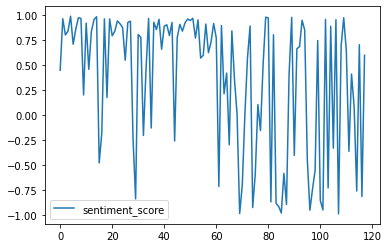

In [47]:
df_output[["sentiment_score"]].plot()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="row_id")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Total Score')
fig.show()

In [75]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
from nltk.corpus import stopwords
# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')
STOPWORDS = set(stopwords)
STOPWORDS.update(["br", "href"])
textt = " ".join(review for review in df_output.Response)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

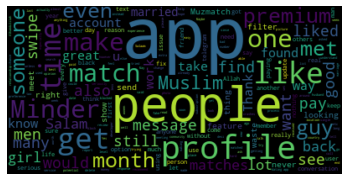

In [77]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [81]:
df = df_output[df_output[["sentiment_score"]] != 3]
df['sentiment'] = df_output[["sentiment_score"]].apply(lambda rating : +1 if rating > 3 else -1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().